In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

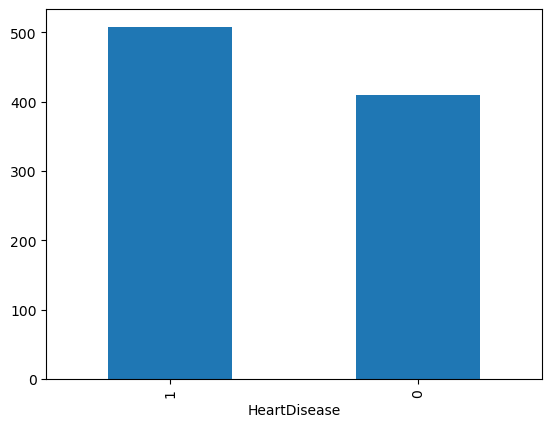

In [9]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

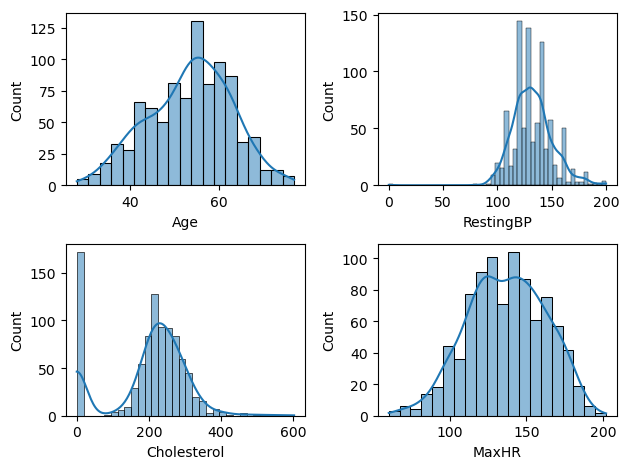

In [12]:
def plotting (var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('Age',1)
plotting('RestingBP',2)
plotting("Cholesterol",3)
plotting('MaxHR',4)

plt.tight_layout()

In [13]:
cholesterol_mean = df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()

In [ ]:
# replace zero with calculated mean 
df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_mean)

In [14]:
# round 2 to decimal places if needed 
df['Cholesterol'] = df['Cholesterol'].round(2)

In [ ]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

<Axes: xlabel='Sex', ylabel='count'>

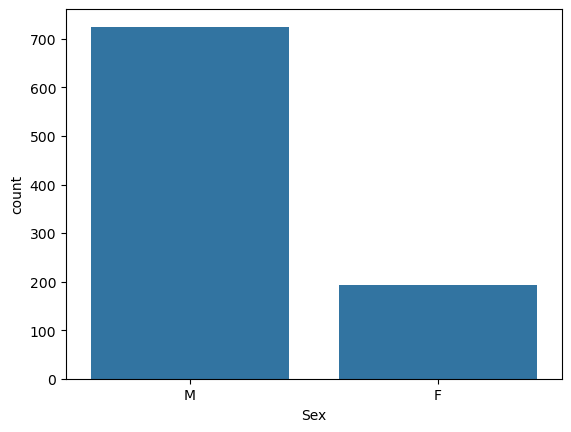

In [15]:
sns.countplot(x = df['Sex'])

<Axes: xlabel='ChestPainType', ylabel='count'>

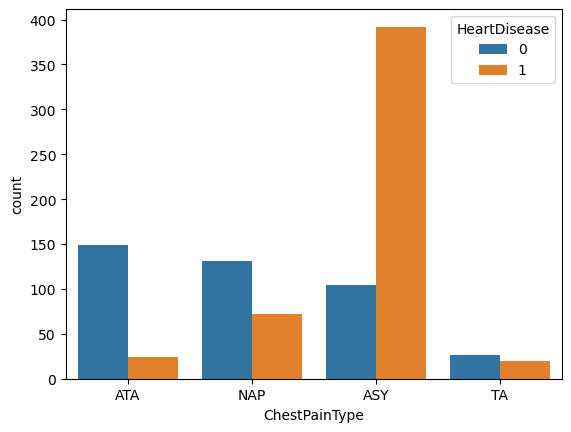

In [17]:

#"Split each bar into sub-bars based on another categorical variable and color them differently."
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

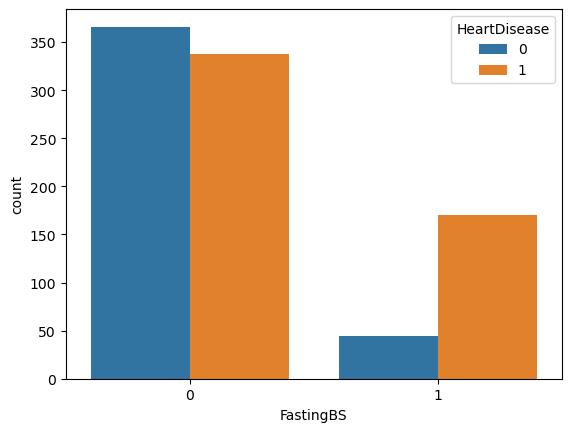

In [18]:
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

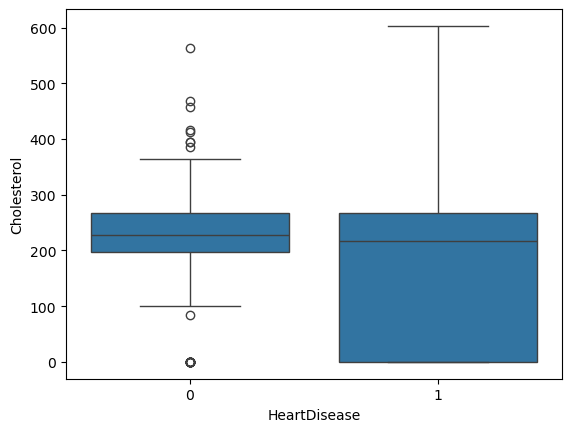

In [19]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)


#Boxplot ek statistical graph hai jo kisi numerical data ka summary dikhata hai — jisme minimum, maximum, median, aur outliers clearly dikhte hain.
# Ye mainly data distribution aur spread samajhne ke liye use hota hai.

<Axes: xlabel='HeartDisease', ylabel='Age'>

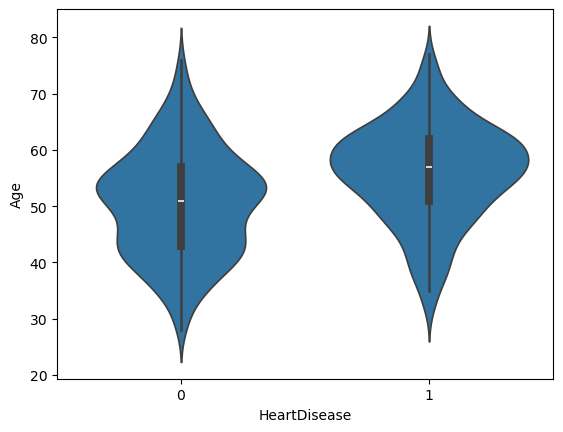

In [20]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

#

<Axes: >

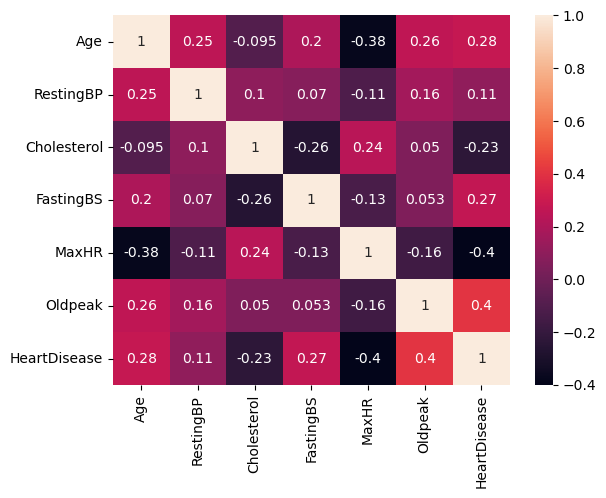

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data preprocessign and cleaning 

In [22]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
df_encoded = pd.get_dummies(df,drop_first=True)

#1. pd.get_dummies(df) ka matlab

#Ye Pandas ka function hai jo categorical columns ko one-hot encoding me convert karta hai.

#One-hot encoding → Har category ke liye ek naya column (0/1) banata hai.

In [24]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [25]:
df_encoded = df_encoded.astype(int)

In [26]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [27]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [31]:
X = df_encoded.drop('HeartDisease',axis = 1)
Y = df_encoded['HeartDisease']

# X - input variable 
# Y - Target values 

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,stratify = Y, test_size = 0.2, random_state = 42
)



# 1. train_test_split ka kaam

# Ye scikit-learn ka function hai jo tumhare dataset ko training set aur testing set me divide karta hai.

# Training set → Model ko train karne ke liye.

# Testing set → Model ka performance check karne ke liye.

# 2. Parameters ka meaning
# X, Y

# X = Features (inputs)

# Y = Labels (output/target)
# Ye dono split honge training aur testing me.

# stratify=Y

# Iska matlab: Split karte time Y ke class proportions same rakhna.

# Example: Agar tumhare data me HeartDisease = 1 ka 60% aur 0 ka 40% hai, to training aur testing dono me yahi ratio maintain hoga.

# Ye imbalanced dataset me bias avoid karta hai.

# test_size=0.2

# Testing set = 20% data

# Training set = 80% data

# random_state=42

# Ye ek seed number hai jo random split ko repeatable banata hai.

# Agar tum same random_state dobara run karoge to same split milega.

# 3. Output Variables

# X_train → Training features (80% of X)

# X_test → Testing features (20% of X)

# Y_train → Training labels (80% of Y)

# Y_test → Testing labels (20% of Y)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Bayes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVM(RBF Kernel)": SVC(probability=True)
}

In [37]:
results = []

In [39]:
for name, model in models.items():
    model.fit(X_train_scaled,Y_train)
    Y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test,Y_pred)
    results.append({
        "Model":name,
        "Accuracy":round(acc,4),
        'F1 Score':round(f1,4)
    })

In [40]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8859, 'F1 Score': 0.9005},
 {'Model': 'KNN', 'Accuracy': 0.8859, 'F1 Score': 0.8995},
 {'Model': 'Naive Bayes', 'Accuracy': 0.913, 'F1 Score': 0.9208},
 {'Model': 'Decision Tree', 'Accuracy': 0.7717, 'F1 Score': 0.8019},
 {'Model': 'SVM(RBF Kernel)', 'Accuracy': 0.8967, 'F1 Score': 0.91},
 {'Model': 'Logistic Regression', 'Accuracy': 0.8859, 'F1 Score': 0.9005},
 {'Model': 'KNN', 'Accuracy': 0.8859, 'F1 Score': 0.8995},
 {'Model': 'Naive Bayes', 'Accuracy': 0.913, 'F1 Score': 0.9208},
 {'Model': 'Decision Tree', 'Accuracy': 0.7663, 'F1 Score': 0.7943},
 {'Model': 'SVM(RBF Kernel)', 'Accuracy': 0.8967, 'F1 Score': 0.91}]

In [41]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')




# 1. import joblib

# joblib ek Python library hai jo objects ko save (serialize) aur load (deserialize) karne ke kaam aati hai.

# Mostly large ML models, scalers, numpy arrays, pandas DataFrames save karne ke liye use hoti hai.

# 2. joblib.dump(models['KNN'], 'KNN_heart.pkl')

# models['KNN'] → Tumhare trained KNN model ka object.

# 'KNN_heart.pkl' → File name jisme model save hoga (.pkl = pickle file format).

# Iska matlab:

# "Mera KNN model disk pe save kar do taaki main baad me bina dobara train kiye load karke use kar saku."

# 3. joblib.dump(scaler, 'scaler.pkl')

# scaler → Tumhara trained StandardScaler object (jo tumne fit kiya tha training data pe).

# Isko save karna important hai taaki jab tum new data pe predict karo to same scaling apply ho jo training time pe hui thi.

# 4. joblib.dump(X.columns.tolist(), 'columns.pkl')

# X.columns.tolist() → Tumhare features (columns) ka list.

# Isko save karne ka reason: Jab future me new data aayega, tum ensure kar sako ki columns ka order aur naming same ho jaise training me tha.

# 💡 In short:

# KNN_heart.pkl → Trained ML model

# scaler.pkl → StandardScaler ka trained object

# columns.pkl → Features ka list for consistency

['columns.pkl']